In [1]:
#import dependencies 
import pandas as pd
import requests 
import random
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from citipy import citipy

#import 
from config import api_key

#create output data file
output_data_file = "output_data/cities.csv"

In [2]:
# List for holding lat_lngs and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lat, long)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        record += 1
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found.')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | placido de castro
Processing Record 2 | beringovskiy
Processing Record 3 | haines junction
Processing Record 4 | busselton
Processing Record 5 | cabo san lucas
Processing Record 6 | hermanus
Processing Record 7 | jamestown
Processing Record 8 | gat
Processing Record 9 | nichinan
City not found.
City not found.
Processing Record 10 | san cristobal
Processing Record 11 | yenagoa
Processing Record 12 | albany
Processing Record 13 | marsa matruh
Processing Record 14 | hobyo
Processing Record 15 | salinopolis
Processing Record 16 | bonthe
City not found.
Processing Record 17 | port alfred
Processing Record 18 | rikitea
Processing Record 19 | georgetown
Processing Record 20 | ancud
Processing Record 21 | tasiilaq
Processing Record 22 | cayenne
Processing Record 23 | hasaki
Processing Record 24 | chuy
Processing Record 25 | conceicao do araguaia
Processing Record 26 | mar del plata
Processing Record 27 | antalaha
Process

Processing Record 237 | hualmay
Processing Record 238 | richards bay
Processing Record 239 | ayame
Processing Record 240 | freeport
Processing Record 241 | muzhi
Processing Record 242 | pak phanang
Processing Record 243 | camana
Processing Record 244 | diego de almagro
Processing Record 245 | benghazi
Processing Record 246 | santa rosa
Processing Record 247 | terrace
Processing Record 248 | fene
Processing Record 249 | victoria
Processing Record 250 | bonanza
Processing Record 251 | vieux fort
Processing Record 252 | el ejido
Processing Record 253 | sabinov
Processing Record 254 | bratsk
Processing Record 255 | sangar
Processing Record 256 | nanortalik
Processing Record 257 | nizhniy kuranakh
Processing Record 258 | mezhdurechensk
Processing Record 259 | half moon bay
Processing Record 260 | bonavista
Processing Record 261 | patea
Processing Record 262 | raudeberg
Processing Record 263 | port lincoln
Processing Record 264 | severo-kurilsk
City not found.
City not found.
Processing Reco

Processing Record 473 | uttarkashi
Processing Record 474 | filadelfia
Processing Record 475 | talara
Processing Record 476 | olyka
Processing Record 477 | delvine
Processing Record 478 | buchanan
Processing Record 479 | pinega
Processing Record 480 | nelson bay
Processing Record 481 | mayumba
Processing Record 482 | carballo
Processing Record 483 | damghan
Processing Record 484 | piterka
City not found.
Processing Record 485 | bogovarovo
Processing Record 486 | zhezkazgan
Processing Record 487 | jinchang
Processing Record 488 | johi
Processing Record 489 | necochea
Processing Record 490 | fiumicino
City not found.
Processing Record 491 | traverse city
Processing Record 492 | zhigansk
Processing Record 493 | mazamet
Processing Record 494 | naze
Processing Record 495 | mattru
Processing Record 496 | borovoy
Processing Record 497 | skibbereen
Processing Record 498 | toda raisingh
Processing Record 499 | usinsk
Processing Record 500 | mangrol
City not found.
Processing Record 501 | chicama

In [4]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
weather_df = pd.DataFrame(weatherdata)
#output to csv
weather_df.to_csv('weatherdata.csv')

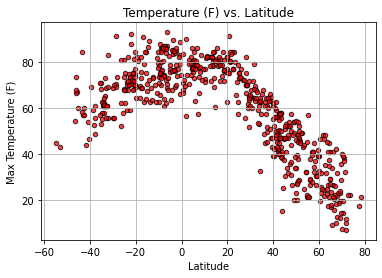

In [8]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(weather_df['Lat'], weather_df['Max Temperature'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('Temperature (F) vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Max_Temp_vs_Lat.png')
plt.show()

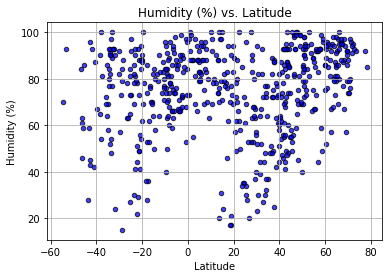

In [10]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Humidity_vs_Lat.png')

plt.show()

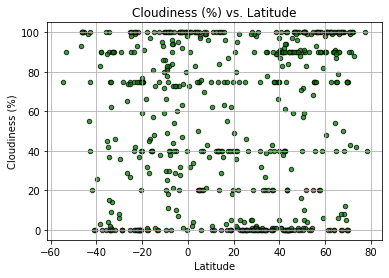

In [11]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Cloudiness_vs_Lat.png')
plt.show()

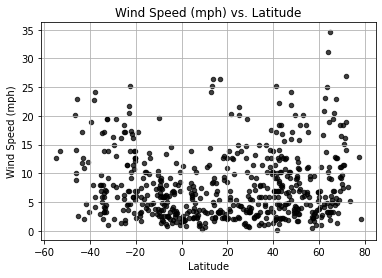

In [12]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', s=20, c='black', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Windspeed_vs_Lat.png')
plt.show()

In [13]:
# This function creates a scatter plot and linear regression based on a dataframe
# df = dataframe
# hemisphere = "Northern" or "Southern", indicates for which hemisphere you would like to plot
# column_1 = column name (string) that will be the x axis
# column_2 = column name (string) that will be the y axis
# x_name = desired name of xlabel
# y_label = desired name of ylabel

def plot_linear_regr(df, hemisphere, column_1, column_2, x_name, y_name):
    # Filter DataFrame to desired hemisphere
    if hemisphere == 'Northern':
        df_f = df.loc[df['Lat']>0]
    elif hemisphere == 'Southern':
        df_f = df.loc[df['Lat']<0]
    # Set up scatter plot
    df_f.plot(kind='scatter', x= column_1, y= column_2, title = f'{y_name} by {x_name} for the {hemisphere} Hemisphere')

    # Define x and y
    x = df_f[[column_1]]
    y = df_f[column_2]

    #Create linear regression object
    regr = linear_model.LinearRegression()

    # Train linear regression model
    regr.fit(x, y)

    # Make predictions
    y_pred = regr.predict(x)

    # Calculate coefficients
    print(f'R squared: {r2_score(y, y_pred)}')
    line_eq = f'y = {round(regr.coef_[0], 2)}x + {regr.intercept_}'
    
    # Plot linear regression
    fig = plt.plot(x, y_pred, color='r')
    
    # Label the plot
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    
    # Put annotation in bottom lefthand corner
    axis = plt.gca()
    axis.annotate(line_eq, xy=(0.2, 0.2), xycoords='figure fraction', color='r', bbox=dict(boxstyle='square', color='lightgrey', alpha=0.5))
    
    # Format plot to save to png
    plt.tight_layout()
    
    # Save figure name without spaces 
    column_2_f = column_2.replace(' ', '')
    plt.savefig(f'output_data/{hemisphere}{column_1}by{column_2_f}.png')
    
    plt.show()